# Data Science Challenge

In [207]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import ttest_ind

pd.set_option("display.max_columns", 101)

## Data Wrangling & Visualization

### 1-1 EDA

In [208]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [209]:
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0


In [210]:
#Explore columns
data.columns

Index(['id', 'dep_stn', 'arr_stn', 'ac_code', 'dep_date', 'arr_date',
       'weather', 'hobbs_meter', 'year_man', 'dep_country', 'arr_country',
       'delay'],
      dtype='object')

In [211]:
#Description
data.describe()

,hobbs_meter,delay
count,5000.000000,5000.00000
mean,6186.797000,20.51060
std,1693.004034,12.27381
min,3329.000000,2.00000
25%,4501.000000,10.00000
50%,6099.000000,18.00000
75%,7437.000000,30.00000
max,9137.000000,49.00000


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5000 non-null   object 
 1   dep_stn      5000 non-null   object 
 2   arr_stn      5000 non-null   object 
 3   ac_code      5000 non-null   object 
 4   dep_date     5000 non-null   object 
 5   arr_date     5000 non-null   object 
 6   weather      5000 non-null   object 
 7   hobbs_meter  5000 non-null   int64  
 8   year_man     5000 non-null   object 
 9   dep_country  5000 non-null   object 
 10  arr_country  5000 non-null   object 
 11  delay        5000 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 468.9+ KB


In [213]:
for col in data.columns:
    print (col, "'s unique values: ", data[col].unique(), "\n")

id 's unique values:  ['TU 0930 ' 'TU 0526 ' 'TU 0718 ' 'TU 0997 ' 'TU 0700 ' 'TU 0719 '
 'TU 0851 ' 'TU 0635 ' 'TU 9038 ' 'TU 0648 ' 'TU 0929 ' 'TU 0744 '
 'TU 0996 ' 'TU 0931 ' 'TU 0282 ' 'TU 0481 ' 'TU 0711 ' 'TU 0463 '
 'TU 0789 ' 'TU 0246 ' 'TU 0903 ' 'TU 0339 ' 'TU 0226 ' 'TU 0881 '
 'TU 0701 ' 'TU 0717 ' 'TU 0790 ' 'TU 0606 ' 'TU 0283 ' 'TU 0756 '
 'TU 0757 ' 'TU 0722 ' 'TU 0634 ' 'TU 0712 ' 'TU 0375 ' 'TU 0814 '
 'TU 0251 ' 'TU 0853 ' 'TU 0643 ' 'TU 0441 ' 'TU 0724 ' 'TU 0856 '
 'TU 0716 ' 'TU 0720 ' 'TU 0338 ' 'TU 0713 ' 'TU 0680 ' 'TU 0727 '
 'TU 0603 ' 'TU 0791 ' 'TU 0752 ' 'TU 0440 ' 'TU 0745 ' 'TU 0607 '
 'TU 0217 ' 'TU 0397 ' 'TU 0614 ' 'TU 0542 ' 'TU 0753 ' 'TU 0543 '
 'TU 0902 ' 'TU 0250 ' 'TU 0514 ' 'TU 0472 ' 'TU 0813 ' 'TU 0681 '
 'TU 0850 ' 'TU 0209 ' 'TU 0396 ' 'TU 0527 ' 'TU 0848 ' 'TU 0216 '
 'TU 0723 ' 'TU 0913 ' 'TU 0215 ' 'TU 0788 ' 'TU 6180 ' 'TU 0642 '
 'TU 0694 ' 'TU 0613 ' 'TU 0374 ' 'TU 0725 ' 'TU 0750 ' 'TU 0709 '
 'TU 0564 ' 'TU 0874 ' 'TU 6497 ' 'TU 07

From above, we know that:

1. Several features are categorical, so one-hot encoding might be required for the modeling process.
2. Some features could be transformed into new features, and we will implement in the Feature Engineering Section.

### 1-2 Data Cleaning

#### Missing data imputation

In [214]:
data.isna().sum()

id             0
dep_stn        0
arr_stn        0
ac_code        0
dep_date       0
arr_date       0
weather        0
hobbs_meter    0
year_man       0
dep_country    0
arr_country    0
delay          0
dtype: int64

#### Removing Unecessary Columns

In [215]:
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0


*id* shall be removed as treating identifier as feature might result in bias, e.g., how could we tell that a flight *id* will be permantly more likely to get delayed if other conditions of this flight *id* has changed?

In [216]:
data_ori = data.copy()
data = data.drop(columns = 'id', axis = 1)
data.head()

,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0


#### Feature Engineering

In [217]:
data['company_code'] = data['ac_code'].astype('str').str[:2]

In [218]:
print ("The min departure time of the dataset: ", data['dep_date'].min())
print ("The max departure time of the dataset: ", data['dep_date'].max())

print ("The min arrival time of the dataset: ", data['arr_date'].min())
print ("The max arrival time of the dataset: ", data['arr_date'].max())

The min departure time of the dataset:  2016-01-01 07:55:00
The max departure time of the dataset:  2017-11-08 11:15:00
The min arrival time of the dataset:  2016-01-01 09.30.00
The max arrival time of the dataset:  2017-11-08 13.10.00


In [219]:
data['arr_date'] = data['arr_date'].str.replace(".", ":")

/tmp/ipykernel_399/1960715992.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['arr_date'] = data['arr_date'].str.replace(".", ":")


In [220]:
data['dep_date'] = data.loc[:, 'dep_date'].astype("datetime64[ns]")
data['arr_date'] = data.loc[:, 'arr_date'].astype("datetime64[ns]")

In [221]:
data['dep_is_weekend'] = np.where((data['dep_date'].dt.weekday == 5)|(data['dep_date'].dt.weekday == 6), 1, 0)
data['dep_is_daylight'] = np.where((data['dep_date'].dt.hour >= 6) & (data['dep_date'].dt.hour < 18), 1, 0)

data['arr_is_weekend'] = np.where((data['arr_date'].dt.weekday == 5)|(data['arr_date'].dt.weekday == 6), 1, 0)
data['arr_is_daylight'] = np.where((data['arr_date'].dt.hour >= 6)&(data['arr_date'].dt.hour < 18), 1, 0)


In [222]:
data[['dep_date', 'dep_is_weekend', 'dep_is_daylight', 'arr_date', 'arr_is_weekend', 'arr_is_daylight']]

,dep_date,dep_is_weekend,dep_is_daylight,arr_date,arr_is_weekend,arr_is_daylight
0,2016-01-01 07:55:00,0,1,2016-01-01 09:30:00,0,1
1,2016-01-01 08:20:00,0,1,2016-01-01 11:05:00,0,1
2,2016-01-01 10:05:00,0,1,2016-01-01 12:25:00,0,1
3,2016-01-01 10:15:00,0,1,2016-01-01 11:50:00,0,1
4,2016-01-01 12:40:00,0,1,2016-01-01 14:35:00,0,1
...,...,...,...,...,...,...
4995,2017-11-07 15:15:00,0,1,2017-11-07 16:25:00,0,1
4996,2017-11-07 16:00:00,0,1,2017-11-07 18:35:00,0,0
4997,2017-11-07 18:30:00,0,0,2017-11-07 20:40:00,0,0
4998,2017-11-08 10:30:00,0,1,2017-11-08 12:55:00,0,1


In [223]:
data['duration'] = (data['arr_date'] - data['dep_date']).astype('timedelta64[m]')
data['duration'] = data['duration'].astype('int')
data['duration'] = np.ceil(data['duration']/60).astype('int')

In [224]:
# data[data['duration'] == 1][['dep_date','arr_date']]
# data[['duration', 'dep_date','arr_date']]

In [225]:
data['duration'].value_counts()

3    2509
2    1717
4     267
5     234
1     166
6      73
9      32
8       2
Name: duration, dtype: int64

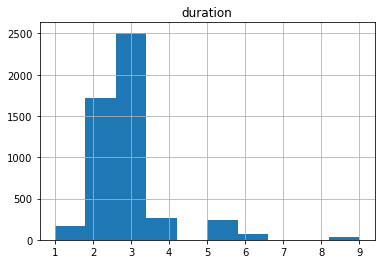

In [226]:
_ = data.hist(column='duration', bins = 10)

In [227]:
data['duration_is_short'] = np.where(data['duration'] <= 3, 1, 0)

In [228]:
data['hobbs_meter'].value_counts()

4301    256
5351    254
7307    251
6117    248
8941    247
5467    222
7437    220
7582    217
4086    217
8987    216
7003    198
4501    187
6767    185
4390    176
5040    170
5648    167
7254    157
9065    155
3329    152
8499    135
4076    134
6374    126
4293    120
4533    113
5882    112
6099     95
4427     84
8748     82
4502     31
9137     19
6973     13
4749      7
4194      5
7409      5
4680      3
5368      3
9016      3
4410      2
4923      2
4385      2
4709      2
7191      2
6774      1
9100      1
8289      1
4463      1
4939      1
Name: hobbs_meter, dtype: int64

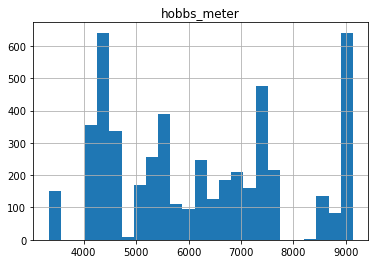

In [229]:
_ = data.hist(column='hobbs_meter', bins = 25)

In [230]:
data['hobbs_meter_cat'] = np.where(
    data['hobbs_meter']<=5000, 
    1, 
    (
        np.where((data['hobbs_meter'] > 5000) & (data['hobbs_meter'] <= 7500), 2, 3)
    )
)
data[['hobbs_meter', 'hobbs_meter_cat']]

,hobbs_meter,hobbs_meter_cat
0,4390,1
1,5882,2
2,6117,2
3,8941,3
4,4301,1
...,...,...
4995,5467,2
4996,4301,1
4997,7437,2
4998,4301,1


In [231]:
data['year_man'] = data['year_man'].astype('str').str[:4].astype('int')

In [232]:
data['year_man'].value_counts()

2004    1426
2003    1119
2010     723
2011     671
2007     449
2009     241
1999     193
2000     143
2008      35
Name: year_man, dtype: int64

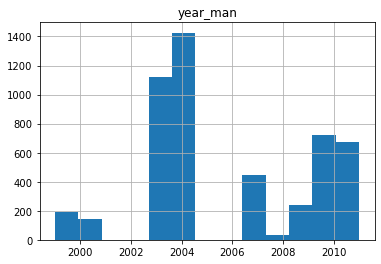

In [233]:
_ = data.hist(column='year_man', bins = 13)

In [234]:
data['year_man_cat'] = np.where(
    data['year_man']<=2000, 
    1, 
    (
        np.where((data['year_man'] > 2000) & (data['year_man'] <= 2005), 2, 3)
    )
)
data[['year_man', 'year_man_cat']]

,year_man,year_man_cat
0,2004,2
1,2010,3
2,2011,3
3,2010,3
4,2004,2
...,...,...
4995,2004,2
4996,2004,2
4997,2011,3
4998,2004,2


Till here, feature engineering is done. Now we want to adjust the variables' type and drop the non-required variables.

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dep_stn            5000 non-null   object        
 1   arr_stn            5000 non-null   object        
 2   ac_code            5000 non-null   object        
 3   dep_date           5000 non-null   datetime64[ns]
 4   arr_date           5000 non-null   datetime64[ns]
 5   weather            5000 non-null   object        
 6   hobbs_meter        5000 non-null   int64         
 7   year_man           5000 non-null   int64         
 8   dep_country        5000 non-null   object        
 9   arr_country        5000 non-null   object        
 10  delay              5000 non-null   float64       
 11  company_code       5000 non-null   object        
 12  dep_is_weekend     5000 non-null   int64         
 13  dep_is_daylight    5000 non-null   int64         
 14  arr_is_w

In [236]:
data['hobbs_meter_cat'] = data['hobbs_meter_cat'].astype("object")
data['year_man_cat'] = data['year_man_cat'].astype("object")

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dep_stn            5000 non-null   object        
 1   arr_stn            5000 non-null   object        
 2   ac_code            5000 non-null   object        
 3   dep_date           5000 non-null   datetime64[ns]
 4   arr_date           5000 non-null   datetime64[ns]
 5   weather            5000 non-null   object        
 6   hobbs_meter        5000 non-null   int64         
 7   year_man           5000 non-null   int64         
 8   dep_country        5000 non-null   object        
 9   arr_country        5000 non-null   object        
 10  delay              5000 non-null   float64       
 11  company_code       5000 non-null   object        
 12  dep_is_weekend     5000 non-null   int64         
 13  dep_is_daylight    5000 non-null   int64         
 14  arr_is_w

In [238]:
data_ori_2 = data.copy()
data = data.drop(columns = ['dep_date', 'arr_date'], axis = 1)
data.head()

,dep_stn,arr_stn,ac_code,weather,hobbs_meter,year_man,dep_country,arr_country,delay,company_code,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,duration,duration_is_short,hobbs_meter_cat,year_man_cat
0,TUN,MRS,TU 32AIMD,sunny,4390,2004,Tunisia,France,18.0,TU,0,1,0,1,2,1,1,2
1,TUN,DUS,TU 736IOQ,rainy,5882,2010,Tunisia,Germany,39.0,TU,0,1,0,1,3,1,2,3
2,TUN,ORY,TU 320IMU,foggy,6117,2011,Tunisia,France,14.0,TU,0,1,0,1,3,1,2,3
3,NCE,TUN,TU 320IMT,sunny,8941,2010,France,Tunisia,25.0,TU,0,1,0,1,2,1,3,3
4,TUN,GVA,TU 320IMV,stormy,4301,2004,Tunisia,Switzerland,21.0,TU,0,1,0,1,2,1,1,2


#### Train-Test-Split

In [239]:
df_X = data.drop('delay', axis = 1)
df_y = data['delay']

In [240]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_X, df_y, test_size = 0.2, random_state = 0)

print ("training dataset shape of X and y: ", X_train1.shape, y_train1.shape)
print ("testing dataset shape of X and y: ", X_test1.shape, y_test1.shape)

training dataset shape of X and y:  (4000, 17) (4000,)
testing dataset shape of X and y:  (1000, 17) (1000,)


#### One-hot Encoding

In [241]:
total_distinct_values = 0
count_col = 0
num_col, cat_col = [], []

for col in X_train1.columns:
    if (X_train1[col].dtype == 'object'):
        cat_col.append(col)
        print (col)
        print ("Its number of distinct values: ", len(X_train1[col].unique()))
        total_distinct_values = total_distinct_values + len(X_train1[col].unique())
        count_col += 1
    else:
        num_col.append(col)
        
print ("Numeric variables: \n", num_col)
print ("Categorical variables: \n", cat_col)
print ("Total distinct values: ", total_distinct_values)
print ("Total number of categorical variables: ", count_col)

dep_stn
Its number of distinct values:  68
arr_stn
Its number of distinct values:  68
ac_code
Its number of distinct values:  46
weather
Its number of distinct values:  6
dep_country
Its number of distinct values:  35
arr_country
Its number of distinct values:  33
company_code
Its number of distinct values:  9
hobbs_meter_cat
Its number of distinct values:  3
year_man_cat
Its number of distinct values:  3
Numeric variables: 
 ['hobbs_meter', 'year_man', 'dep_is_weekend', 'dep_is_daylight', 'arr_is_weekend', 'arr_is_daylight', 'duration', 'duration_is_short']
Categorical variables: 
 ['dep_stn', 'arr_stn', 'ac_code', 'weather', 'dep_country', 'arr_country', 'company_code', 'hobbs_meter_cat', 'year_man_cat']
Total distinct values:  271
Total number of categorical variables:  9


In [242]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train1[cat_col])

X_train1_cat = pd.DataFrame(enc.transform(X_train1[cat_col]).toarray())

In [243]:
X_train1_cat.columns = enc.get_feature_names_out(cat_col)
X_train1_cat

,dep_stn_ABJ,dep_stn_AHU,dep_stn_ALG,dep_stn_AMS,dep_stn_AYT,dep_stn_BCN,dep_stn_BEG,dep_stn_BEY,dep_stn_BKO,dep_stn_BOD,dep_stn_BRQ,dep_stn_BRU,dep_stn_BTS,dep_stn_BUD,dep_stn_CAI,dep_stn_CDG,dep_stn_CGN,dep_stn_CKY,dep_stn_CMN,dep_stn_CRL,dep_stn_CZL,dep_stn_DJE,dep_stn_DKR,dep_stn_DUS,dep_stn_FCO,dep_stn_FRA,dep_stn_GNB,dep_stn_GVA,dep_stn_HAM,dep_stn_IST,dep_stn_JED,dep_stn_KGL,dep_stn_LED,dep_stn_LGW,dep_stn_LHR,dep_stn_LIS,dep_stn_LYS,dep_stn_MAD,dep_stn_MED,dep_stn_MIR,dep_stn_MLA,dep_stn_MRS,dep_stn_MUC,dep_stn_MXP,dep_stn_NCE,dep_stn_NDR,dep_stn_NIM,dep_stn_NKC,dep_stn_NTE,dep_stn_ORN,...,dep_country_Turkey,dep_country_United Kingdom,arr_country_Algeria,arr_country_Austria,arr_country_Belgium,arr_country_Burkina Faso,arr_country_Congo,arr_country_Cote d'Ivoire,arr_country_Czech Republic,arr_country_Egypt,arr_country_France,arr_country_Germany,arr_country_Greece,arr_country_Guinea,arr_country_Hungary,arr_country_Italy,arr_country_Lebanon,arr_country_Mali,arr_country_Malta,arr_country_Mauritania,arr_country_Morocco,arr_country_Netherlands,arr_country_Niger,arr_country_Portugal,arr_country_QC,arr_country_Russia,arr_country_Saudi Arabia,arr_country_Senegal,arr_country_Serbia and Montenegro,arr_country_Slovenia,arr_country_Spain,arr_country_Switzerland,arr_country_Tunisia,arr_country_Turkey,arr_country_United Kingdom,company_code_5K,company_code_5M,company_code_BJ,company_code_D4,company_code_PS,company_code_QS,company_code_TU,company_code_UG,company_code_UJ,hobbs_meter_cat_1,hobbs_meter_cat_2,hobbs_meter_cat_3,year_man_cat_1,year_man_cat_2,year_man_cat_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [244]:
X_train1_num = X_train1[num_col].reset_index(drop=True)
X_train1_num

,hobbs_meter,year_man,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,duration,duration_is_short
0,8941,2010,0,1,0,1,2,1
1,6774,2009,1,1,1,1,2,1
2,4076,2000,1,1,1,1,3,1
3,5351,2003,0,1,0,1,2,1
4,7582,2003,0,1,0,0,3,1
...,...,...,...,...,...,...,...,...
3995,5467,2004,0,1,0,1,3,1
3996,4390,2004,0,1,0,1,3,1
3997,7307,2007,1,1,1,1,1,1
3998,4501,2003,0,1,0,1,3,1


In [245]:
X_train1_ohe = pd.concat([X_train1_num, X_train1_cat], axis = 1)
X_train1_ohe

,hobbs_meter,year_man,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,duration,duration_is_short,dep_stn_ABJ,dep_stn_AHU,dep_stn_ALG,dep_stn_AMS,dep_stn_AYT,dep_stn_BCN,dep_stn_BEG,dep_stn_BEY,dep_stn_BKO,dep_stn_BOD,dep_stn_BRQ,dep_stn_BRU,dep_stn_BTS,dep_stn_BUD,dep_stn_CAI,dep_stn_CDG,dep_stn_CGN,dep_stn_CKY,dep_stn_CMN,dep_stn_CRL,dep_stn_CZL,dep_stn_DJE,dep_stn_DKR,dep_stn_DUS,dep_stn_FCO,dep_stn_FRA,dep_stn_GNB,dep_stn_GVA,dep_stn_HAM,dep_stn_IST,dep_stn_JED,dep_stn_KGL,dep_stn_LED,dep_stn_LGW,dep_stn_LHR,dep_stn_LIS,dep_stn_LYS,dep_stn_MAD,dep_stn_MED,dep_stn_MIR,dep_stn_MLA,dep_stn_MRS,...,dep_country_Turkey,dep_country_United Kingdom,arr_country_Algeria,arr_country_Austria,arr_country_Belgium,arr_country_Burkina Faso,arr_country_Congo,arr_country_Cote d'Ivoire,arr_country_Czech Republic,arr_country_Egypt,arr_country_France,arr_country_Germany,arr_country_Greece,arr_country_Guinea,arr_country_Hungary,arr_country_Italy,arr_country_Lebanon,arr_country_Mali,arr_country_Malta,arr_country_Mauritania,arr_country_Morocco,arr_country_Netherlands,arr_country_Niger,arr_country_Portugal,arr_country_QC,arr_country_Russia,arr_country_Saudi Arabia,arr_country_Senegal,arr_country_Serbia and Montenegro,arr_country_Slovenia,arr_country_Spain,arr_country_Switzerland,arr_country_Tunisia,arr_country_Turkey,arr_country_United Kingdom,company_code_5K,company_code_5M,company_code_BJ,company_code_D4,company_code_PS,company_code_QS,company_code_TU,company_code_UG,company_code_UJ,hobbs_meter_cat_1,hobbs_meter_cat_2,hobbs_meter_cat_3,year_man_cat_1,year_man_cat_2,year_man_cat_3
0,8941,2010,0,1,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,6774,2009,1,1,1,1,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,4076,2000,1,1,1,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,5351,2003,0,1,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,7582,2003,0,1,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5467,20

In [246]:
X_test1_cat = pd.DataFrame(enc.transform(X_test1[cat_col]).toarray())
X_test1_cat.columns = enc.get_feature_names_out(cat_col)
X_test1_cat

,dep_stn_ABJ,dep_stn_AHU,dep_stn_ALG,dep_stn_AMS,dep_stn_AYT,dep_stn_BCN,dep_stn_BEG,dep_stn_BEY,dep_stn_BKO,dep_stn_BOD,dep_stn_BRQ,dep_stn_BRU,dep_stn_BTS,dep_stn_BUD,dep_stn_CAI,dep_stn_CDG,dep_stn_CGN,dep_stn_CKY,dep_stn_CMN,dep_stn_CRL,dep_stn_CZL,dep_stn_DJE,dep_stn_DKR,dep_stn_DUS,dep_stn_FCO,dep_stn_FRA,dep_stn_GNB,dep_stn_GVA,dep_stn_HAM,dep_stn_IST,dep_stn_JED,dep_stn_KGL,dep_stn_LED,dep_stn_LGW,dep_stn_LHR,dep_stn_LIS,dep_stn_LYS,dep_stn_MAD,dep_stn_MED,dep_stn_MIR,dep_stn_MLA,dep_stn_MRS,dep_stn_MUC,dep_stn_MXP,dep_stn_NCE,dep_stn_NDR,dep_stn_NIM,dep_stn_NKC,dep_stn_NTE,dep_stn_ORN,...,dep_country_Turkey,dep_country_United Kingdom,arr_country_Algeria,arr_country_Austria,arr_country_Belgium,arr_country_Burkina Faso,arr_country_Congo,arr_country_Cote d'Ivoire,arr_country_Czech Republic,arr_country_Egypt,arr_country_France,arr_country_Germany,arr_country_Greece,arr_country_Guinea,arr_country_Hungary,arr_country_Italy,arr_country_Lebanon,arr_country_Mali,arr_country_Malta,arr_country_Mauritania,arr_country_Morocco,arr_country_Netherlands,arr_country_Niger,arr_country_Portugal,arr_country_QC,arr_country_Russia,arr_country_Saudi Arabia,arr_country_Senegal,arr_country_Serbia and Montenegro,arr_country_Slovenia,arr_country_Spain,arr_country_Switzerland,arr_country_Tunisia,arr_country_Turkey,arr_country_United Kingdom,company_code_5K,company_code_5M,company_code_BJ,company_code_D4,company_code_PS,company_code_QS,company_code_TU,company_code_UG,company_code_UJ,hobbs_meter_cat_1,hobbs_meter_cat_2,hobbs_meter_cat_3,year_man_cat_1,year_man_cat_2,year_man_cat_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [247]:
X_test1_num = X_test1[num_col].reset_index(drop=True)
X_test1_num

,hobbs_meter,year_man,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,duration,duration_is_short
0,4301,2004,0,1,0,1,2,1
1,6117,2011,0,1,0,1,3,1
2,5467,2004,1,1,1,1,2,1
3,7254,2004,1,1,1,1,2,1
4,8941,2010,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...
995,5351,2003,0,0,0,0,3,1
996,4533,2009,0,1,0,1,2,1
997,5351,2003,1,1,1,1,2,1
998,5040,2010,0,0,0,1,3,1


In [248]:
X_test1_ohe = pd.concat([X_test1_num, X_test1_cat], axis = 1)
X_test1_ohe

,hobbs_meter,year_man,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,duration,duration_is_short,dep_stn_ABJ,dep_stn_AHU,dep_stn_ALG,dep_stn_AMS,dep_stn_AYT,dep_stn_BCN,dep_stn_BEG,dep_stn_BEY,dep_stn_BKO,dep_stn_BOD,dep_stn_BRQ,dep_stn_BRU,dep_stn_BTS,dep_stn_BUD,dep_stn_CAI,dep_stn_CDG,dep_stn_CGN,dep_stn_CKY,dep_stn_CMN,dep_stn_CRL,dep_stn_CZL,dep_stn_DJE,dep_stn_DKR,dep_stn_DUS,dep_stn_FCO,dep_stn_FRA,dep_stn_GNB,dep_stn_GVA,dep_stn_HAM,dep_stn_IST,dep_stn_JED,dep_stn_KGL,dep_stn_LED,dep_stn_LGW,dep_stn_LHR,dep_stn_LIS,dep_stn_LYS,dep_stn_MAD,dep_stn_MED,dep_stn_MIR,dep_stn_MLA,dep_stn_MRS,...,dep_country_Turkey,dep_country_United Kingdom,arr_country_Algeria,arr_country_Austria,arr_country_Belgium,arr_country_Burkina Faso,arr_country_Congo,arr_country_Cote d'Ivoire,arr_country_Czech Republic,arr_country_Egypt,arr_country_France,arr_country_Germany,arr_country_Greece,arr_country_Guinea,arr_country_Hungary,arr_country_Italy,arr_country_Lebanon,arr_country_Mali,arr_country_Malta,arr_country_Mauritania,arr_country_Morocco,arr_country_Netherlands,arr_country_Niger,arr_country_Portugal,arr_country_QC,arr_country_Russia,arr_country_Saudi Arabia,arr_country_Senegal,arr_country_Serbia and Montenegro,arr_country_Slovenia,arr_country_Spain,arr_country_Switzerland,arr_country_Tunisia,arr_country_Turkey,arr_country_United Kingdom,company_code_5K,company_code_5M,company_code_BJ,company_code_D4,company_code_PS,company_code_QS,company_code_TU,company_code_UG,company_code_UJ,hobbs_meter_cat_1,hobbs_meter_cat_2,hobbs_meter_cat_3,year_man_cat_1,year_man_cat_2,year_man_cat_3
0,4301,2004,0,1,0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6117,2011,0,1,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5467,2004,1,1,1,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7254,2004,1,1,1,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,8941,2010,0,0,0,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5351,200

### 1-3 Scaling 


In [249]:
std1 = StandardScaler()
X_train1_std = std1.fit_transform(X_train1_ohe)
X_test1_std = std1.transform(X_test1_ohe)

print ("shape of X_train1: ", X_train1_std.shape)
print ("shape of X_test1: ", X_test1_std.shape)

shape of X_train1:  (4000, 279)
shape of X_test1:  (1000, 279)


## Visualization, Modeling, Machine Learning

Build a regression model to predict how many minutes a flight will be delayed. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on mean absolute percent error.**
- **Read the test.csv file and prepare features for testing.**

### 2-1 Modeling

In [250]:
def MAPE(y_test, y_pred):
    return np.mean((abs(y_pred - y_test) / y_test) * 100)

#### Linear Regression

This serves as baseline model

In [258]:
model_baseLR = LinearRegression()
model_baseLR.fit(X_train1_std, y_train1)

y_pred_LR = model_baseLR.predict(X_test1_std)
print ("The MAPE of Linear Regression: {:.3f}%".format(MAPE(y_test1, y_pred_LR)))

The MAPE of Linear Regression: 3324106459800.269%


In [204]:
model_baseLR = LinearRegression()
model_baseLR.fit(X_train1[num_col], y_train1)

y_pred_LR = model_baseLR.predict(X_test1[num_col])
print ("The MAPE of Linear Regression: {:.3f}%".format(MAPE(y_test1, y_pred_LR)))

The MAPE of Linear Regression: 83.278%


#### Random Forest

In [253]:
model_baseRF = RandomForestRegressor(random_state = 0)
model_baseRF.fit(X_train1_std, y_train1)

y_pred_RF = model_baseRF.predict(X_test1_std)
print ("The MAPE of Random Forest: {:.3f}%".format(MAPE(y_test1, y_pred_RF)))

The MAPE of Random Forest: 79.403%


#### XGBoost

In [259]:
model_baseXGB = XGBRegressor()
model_baseXGB.fit(X_train1_std, y_train1, verbose = False)

y_pred_XGB = model_baseXGB.predict(X_test1_std)
print ("The MAPE of XGBoost: {:.3f}%".format(MAPE(y_test1, y_pred_XGB)))

The MAPE of XGBoost: 81.654%


#### LGBM

In [260]:
model_baseLGBM = LGBMRegressor()
model_baseLGBM.fit(X_train1_std, y_train1)

y_pred_LGBM = model_baseLGBM.predict(X_test1_std)
print ("The MAPE of LGBM: {:.3f}%".format(MAPE(y_test1, y_pred_LGBM)))

The MAPE of LGBM: 80.213%


### 2-2 Visualization


**Describe the most important features of the model to management.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


#### Feature Importanceforest_importancesforest_importancesforest_importances

In [261]:
importances= model_baseRF.feature_importances_
forest_importances = pd.Series(importances, index=X_train1_ohe.columns)
forest_importances = forest_importances.sort_values(ascending = False)[:10]

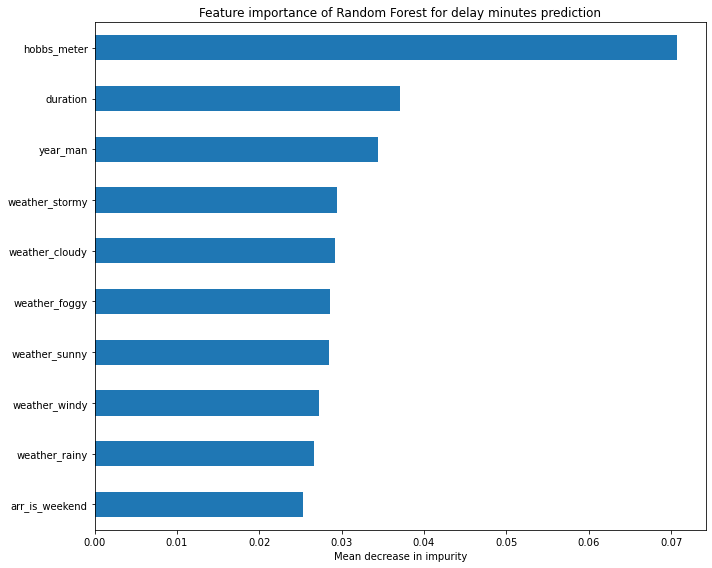

In [263]:
fig, ax = plt.subplots()
forest_importances.plot.barh(ax= ax, figsize=(10, 8)).invert_yaxis()
ax.set_title("Feature importance of Random Forest for delay minutes prediction")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

### 2-3 Prediction for Testing Data

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict how many minutes a flight will be delayed. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **delay**

In [269]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia
2,TU 0527,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,foggy,7437,2011-03,Germany,Tunisia
3,UG 0011,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,foggy,8941,2010-01,Tunisia,Tunisia
4,TU 0214,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,foggy,8941,2010-01,Tunisia,Turkey


#### Testing Data Cleaning

##### Missing data imputation

In [270]:
test_data.isna().sum()

id             0
dep_stn        0
arr_stn        0
ac_code        0
dep_date       0
arr_date       0
weather        0
hobbs_meter    0
year_man       0
dep_country    0
arr_country    0
dtype: int64

##### Removing Unecessary Columns

In [271]:
test_data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia
2,TU 0527,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,foggy,7437,2011-03,Germany,Tunisia
3,UG 0011,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,foggy,8941,2010-01,Tunisia,Tunisia
4,TU 0214,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,foggy,8941,2010-01,Tunisia,Turkey


*id* shall be removed as treating identifier as feature might result in bias, e.g., how could we tell that a flight *id* will be permantly more likely to get delayed if other conditions of this flight *id* has changed?

In [272]:
test_data_ori = test_data.copy()
test_data = test_data.drop(columns = 'id', axis = 1)
test_data.head()

,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
0,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey
1,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia
2,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,foggy,7437,2011-03,Germany,Tunisia
3,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,foggy,8941,2010-01,Tunisia,Tunisia
4,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,foggy,8941,2010-01,Tunisia,Turkey


##### Feature Engineering

In [279]:
test_data['company_code'] = test_data['ac_code'].astype('str').str[:2]

In [273]:
print ("The min departure time of the dataset: ", test_data['dep_date'].min())
print ("The max departure time of the dataset: ", test_data['dep_date'].max())

print ("The min arrival time of the dataset: ", test_data['arr_date'].min())
print ("The max arrival time of the dataset: ", test_data['arr_date'].max())

The min departure time of the dataset:  2017-11-08 16:00:00
The max departure time of the dataset:  2018-12-31 18:35:00
The min arrival time of the dataset:  2017-11-08 18.10.00
The max arrival time of the dataset:  2018-12-31 21.25.00


In [274]:
test_data['arr_date'] = test_data['arr_date'].str.replace(".", ":")

/tmp/ipykernel_399/232820578.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['arr_date'] = test_data['arr_date'].str.replace(".", ":")


In [276]:
test_data['dep_date'] = test_data.loc[:, 'dep_date'].astype("datetime64[ns]")
test_data['arr_date'] = test_data.loc[:, 'arr_date'].astype("datetime64[ns]")

In [277]:
test_data['dep_is_weekend'] = np.where((test_data['dep_date'].dt.weekday == 5)|(test_data['dep_date'].dt.weekday == 6), 1, 0)
test_data['dep_is_daylight'] = np.where((test_data['dep_date'].dt.hour >= 6) & (test_data['dep_date'].dt.hour < 18), 1, 0)

test_data['arr_is_weekend'] = np.where((test_data['arr_date'].dt.weekday == 5)|(test_data['arr_date'].dt.weekday == 6), 1, 0)
test_data['arr_is_daylight'] = np.where((test_data['arr_date'].dt.hour >= 6)&(test_data['arr_date'].dt.hour < 18), 1, 0)


In [278]:
test_data[['dep_date', 'dep_is_weekend', 'dep_is_daylight', 'arr_date', 'arr_is_weekend', 'arr_is_daylight']]

,dep_date,dep_is_weekend,dep_is_daylight,arr_date,arr_is_weekend,arr_is_daylight
0,2017-11-08 16:00:00,0,1,2017-11-08 18:35:00,0,0
1,2017-11-08 16:05:00,0,1,2017-11-08 18:10:00,0,0
2,2017-11-08 16:20:00,0,1,2017-11-08 18:55:00,0,0
3,2017-11-08 19:00:00,0,0,2017-11-08 19:50:00,0,0
4,2017-11-09 06:20:00,0,1,2017-11-09 08:55:00,0,1
...,...,...,...,...,...,...
2995,2018-12-31 10:15:00,0,1,2018-12-31 13:05:00,0,1
2996,2018-12-31 13:40:00,0,1,2018-12-31 15:35:00,0,1
2997,2018-12-31 14:50:00,0,1,2018-12-31 17:50:00,0,1
2998,2018-12-31 16:25:00,0,1,2018-12-31 18:15:00,0,0


In [280]:
test_data['duration'] = (test_data['arr_date'] - test_data['dep_date']).astype('timedelta64[m]')
test_data['duration'] = test_data['duration'].astype('int')
test_data['duration'] = np.ceil(test_data['duration']/60).astype('int')

In [281]:
test_data['duration'].value_counts()

3    1513
2    1001
4     190
5     106
1     105
6      55
9      30
Name: duration, dtype: int64

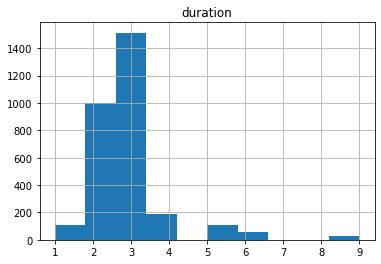

In [282]:
_ = test_data.hist(column='duration', bins = 10)

In [284]:
test_data['duration_is_short'] = np.where(test_data['duration'] <= 3, 1, 0)

In [285]:
test_data['hobbs_meter'].value_counts()

6117    161
7437    158
7307    151
5467    147
7582    144
5351    140
4390    140
8987    139
6767    139
4501    131
8941    130
4301    130
4086    128
7003    119
9065    117
5882    108
4076     90
4293     89
6374     86
8499     82
4427     80
5040     77
6099     76
4533     74
5648     55
9201     26
5842     19
4797     17
7254     14
5701     11
4749      4
4385      3
3329      3
9100      2
5937      2
4923      2
6932      2
4239      1
6774      1
7475      1
4463      1
Name: hobbs_meter, dtype: int64

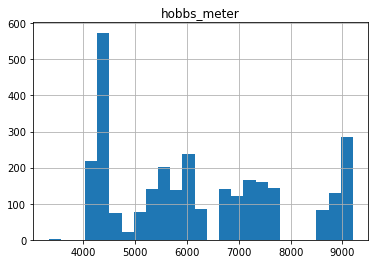

In [286]:
_ = test_data.hist(column='hobbs_meter', bins = 25)

In [287]:
test_data['hobbs_meter_cat'] = np.where(
    test_data['hobbs_meter']<=5000, 
    1, 
    (
        np.where((test_data['hobbs_meter'] > 5000) & (test_data['hobbs_meter'] <= 7500), 2, 3)
    )
)
test_data[['hobbs_meter', 'hobbs_meter_cat']]

,hobbs_meter,hobbs_meter_cat
0,4301,1
1,6117,2
2,7437,2
3,8941,3
4,8941,3
...,...,...
2995,6099,2
2996,7437,2
2997,5882,2
2998,7437,2


In [288]:
test_data['year_man'] = test_data['year_man'].astype('str').str[:4].astype('int')

In [289]:
test_data['year_man'].value_counts()

2004    785
2003    714
2010    473
2011    408
2007    284
2009    165
2000     94
1999     59
2008     18
Name: year_man, dtype: int64

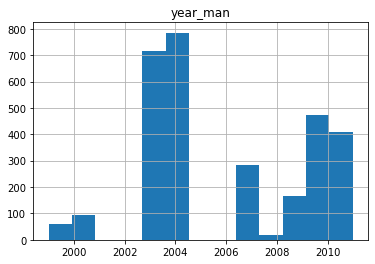

In [290]:
_ = test_data.hist(column='year_man', bins = 13)

In [291]:
test_data['year_man_cat'] = np.where(
    test_data['year_man']<=2000, 
    1, 
    (
        np.where((test_data['year_man'] > 2000) & (test_data['year_man'] <= 2005), 2, 3)
    )
)
test_data[['year_man', 'year_man_cat']]

,year_man,year_man_cat
0,2004,2
1,2011,3
2,2011,3
3,2010,3
4,2010,3
...,...,...
2995,2003,2
2996,2011,3
2997,2010,3
2998,2011,3


Till here, feature engineering is done. Now we want to adjust the variables' type and drop the non-required variables.

In [292]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dep_stn            3000 non-null   object        
 1   arr_stn            3000 non-null   object        
 2   ac_code            3000 non-null   object        
 3   dep_date           3000 non-null   datetime64[ns]
 4   arr_date           3000 non-null   datetime64[ns]
 5   weather            3000 non-null   object        
 6   hobbs_meter        3000 non-null   int64         
 7   year_man           3000 non-null   int64         
 8   dep_country        3000 non-null   object        
 9   arr_country        3000 non-null   object        
 10  dep_is_weekend     3000 non-null   int64         
 11  dep_is_daylight    3000 non-null   int64         
 12  arr_is_weekend     3000 non-null   int64         
 13  arr_is_daylight    3000 non-null   int64         
 14  company_

In [293]:
test_data['hobbs_meter_cat'] = test_data['hobbs_meter_cat'].astype("object")
test_data['year_man_cat'] = test_data['year_man_cat'].astype("object")

In [294]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dep_stn            3000 non-null   object        
 1   arr_stn            3000 non-null   object        
 2   ac_code            3000 non-null   object        
 3   dep_date           3000 non-null   datetime64[ns]
 4   arr_date           3000 non-null   datetime64[ns]
 5   weather            3000 non-null   object        
 6   hobbs_meter        3000 non-null   int64         
 7   year_man           3000 non-null   int64         
 8   dep_country        3000 non-null   object        
 9   arr_country        3000 non-null   object        
 10  dep_is_weekend     3000 non-null   int64         
 11  dep_is_daylight    3000 non-null   int64         
 12  arr_is_weekend     3000 non-null   int64         
 13  arr_is_daylight    3000 non-null   int64         
 14  company_

In [295]:
test_data_ori_2 = test_data.copy()
test_data = test_data.drop(columns = ['dep_date', 'arr_date'], axis = 1)
test_data.head()

,dep_stn,arr_stn,ac_code,weather,hobbs_meter,year_man,dep_country,arr_country,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,company_code,duration,duration_is_short,hobbs_meter_cat,year_man_cat
0,TUN,IST,TU 320IMV,stormy,4301,2004,Tunisia,Turkey,0,1,0,0,TU,3,1,1,2
1,MUC,TUN,TU 320IMU,stormy,6117,2011,Germany,Tunisia,0,1,0,0,TU,3,1,2,3
2,DUS,TUN,TU 32AIMH,foggy,7437,2011,Germany,Tunisia,0,1,0,0,TU,3,1,2,3
3,DJE,TUN,TU 320IMT,foggy,8941,2010,Tunisia,Tunisia,0,0,0,0,TU,1,1,3,3
4,TUN,IST,TU 320IMT,foggy,8941,2010,Tunisia,Turkey,0,1,0,1,TU,3,1,3,3


##### One-hot Encoding

In [296]:
total_distinct_values = 0
count_col = 0
num_col, cat_col = [], []

for col in test_data.columns:
    if (test_data[col].dtype == 'object'):
        cat_col.append(col)
        print (col)
        print ("Its number of distinct values: ", len(test_data[col].unique()))
        total_distinct_values = total_distinct_values + len(test_data[col].unique())
        count_col += 1
    else:
        num_col.append(col)
        
print ("Numeric variables: \n", num_col)
print ("Categorical variables: \n", cat_col)
print ("Total distinct values: ", total_distinct_values)
print ("Total number of categorical variables: ", count_col)

dep_stn
Its number of distinct values:  66
arr_stn
Its number of distinct values:  69
ac_code
Its number of distinct values:  41
weather
Its number of distinct values:  6
dep_country
Its number of distinct values:  34
arr_country
Its number of distinct values:  36
company_code
Its number of distinct values:  6
hobbs_meter_cat
Its number of distinct values:  3
year_man_cat
Its number of distinct values:  3
Numeric variables: 
 ['hobbs_meter', 'year_man', 'dep_is_weekend', 'dep_is_daylight', 'arr_is_weekend', 'arr_is_daylight', 'duration', 'duration_is_short']
Categorical variables: 
 ['dep_stn', 'arr_stn', 'ac_code', 'weather', 'dep_country', 'arr_country', 'company_code', 'hobbs_meter_cat', 'year_man_cat']
Total distinct values:  264
Total number of categorical variables:  9


In [306]:
# enc2 = OneHotEncoder(handle_unknown = 'ignore')
# enc2.fit(test_data[cat_col])

test_data_cat = pd.DataFrame(enc.transform(test_data[cat_col]).toarray())

In [308]:
test_data_cat.columns = enc.get_feature_names_out(cat_col)
test_data_cat

,dep_stn_ABJ,dep_stn_AHU,dep_stn_ALG,dep_stn_AMS,dep_stn_AYT,dep_stn_BCN,dep_stn_BEG,dep_stn_BEY,dep_stn_BKO,dep_stn_BOD,dep_stn_BRQ,dep_stn_BRU,dep_stn_BTS,dep_stn_BUD,dep_stn_CAI,dep_stn_CDG,dep_stn_CGN,dep_stn_CKY,dep_stn_CMN,dep_stn_CRL,dep_stn_CZL,dep_stn_DJE,dep_stn_DKR,dep_stn_DUS,dep_stn_FCO,dep_stn_FRA,dep_stn_GNB,dep_stn_GVA,dep_stn_HAM,dep_stn_IST,dep_stn_JED,dep_stn_KGL,dep_stn_LED,dep_stn_LGW,dep_stn_LHR,dep_stn_LIS,dep_stn_LYS,dep_stn_MAD,dep_stn_MED,dep_stn_MIR,dep_stn_MLA,dep_stn_MRS,dep_stn_MUC,dep_stn_MXP,dep_stn_NCE,dep_stn_NDR,dep_stn_NIM,dep_stn_NKC,dep_stn_NTE,dep_stn_ORN,...,dep_country_Turkey,dep_country_United Kingdom,arr_country_Algeria,arr_country_Austria,arr_country_Belgium,arr_country_Burkina Faso,arr_country_Congo,arr_country_Cote d'Ivoire,arr_country_Czech Republic,arr_country_Egypt,arr_country_France,arr_country_Germany,arr_country_Greece,arr_country_Guinea,arr_country_Hungary,arr_country_Italy,arr_country_Lebanon,arr_country_Mali,arr_country_Malta,arr_country_Mauritania,arr_country_Morocco,arr_country_Netherlands,arr_country_Niger,arr_country_Portugal,arr_country_QC,arr_country_Russia,arr_country_Saudi Arabia,arr_country_Senegal,arr_country_Serbia and Montenegro,arr_country_Slovenia,arr_country_Spain,arr_country_Switzerland,arr_country_Tunisia,arr_country_Turkey,arr_country_United Kingdom,company_code_5K,company_code_5M,company_code_BJ,company_code_D4,company_code_PS,company_code_QS,company_code_TU,company_code_UG,company_code_UJ,hobbs_meter_cat_1,hobbs_meter_cat_2,hobbs_meter_cat_3,year_man_cat_1,year_man_cat_2,year_man_cat_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [309]:
test_data_num = test_data[num_col].reset_index(drop=True)
test_data_num

,hobbs_meter,year_man,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,duration,duration_is_short
0,4301,2004,0,1,0,0,3,1
1,6117,2011,0,1,0,0,3,1
2,7437,2011,0,1,0,0,3,1
3,8941,2010,0,0,0,0,1,1
4,8941,2010,0,1,0,1,3,1
...,...,...,...,...,...,...,...,...
2995,6099,2003,0,1,0,1,3,1
2996,7437,2011,0,1,0,1,2,1
2997,5882,2010,0,1,0,1,3,1
2998,7437,2011,0,1,0,0,2,1


In [310]:
test_data_ohe = pd.concat([test_data_num, test_data_cat], axis = 1)
test_data_ohe

,hobbs_meter,year_man,dep_is_weekend,dep_is_daylight,arr_is_weekend,arr_is_daylight,duration,duration_is_short,dep_stn_ABJ,dep_stn_AHU,dep_stn_ALG,dep_stn_AMS,dep_stn_AYT,dep_stn_BCN,dep_stn_BEG,dep_stn_BEY,dep_stn_BKO,dep_stn_BOD,dep_stn_BRQ,dep_stn_BRU,dep_stn_BTS,dep_stn_BUD,dep_stn_CAI,dep_stn_CDG,dep_stn_CGN,dep_stn_CKY,dep_stn_CMN,dep_stn_CRL,dep_stn_CZL,dep_stn_DJE,dep_stn_DKR,dep_stn_DUS,dep_stn_FCO,dep_stn_FRA,dep_stn_GNB,dep_stn_GVA,dep_stn_HAM,dep_stn_IST,dep_stn_JED,dep_stn_KGL,dep_stn_LED,dep_stn_LGW,dep_stn_LHR,dep_stn_LIS,dep_stn_LYS,dep_stn_MAD,dep_stn_MED,dep_stn_MIR,dep_stn_MLA,dep_stn_MRS,...,dep_country_Turkey,dep_country_United Kingdom,arr_country_Algeria,arr_country_Austria,arr_country_Belgium,arr_country_Burkina Faso,arr_country_Congo,arr_country_Cote d'Ivoire,arr_country_Czech Republic,arr_country_Egypt,arr_country_France,arr_country_Germany,arr_country_Greece,arr_country_Guinea,arr_country_Hungary,arr_country_Italy,arr_country_Lebanon,arr_country_Mali,arr_country_Malta,arr_country_Mauritania,arr_country_Morocco,arr_country_Netherlands,arr_country_Niger,arr_country_Portugal,arr_country_QC,arr_country_Russia,arr_country_Saudi Arabia,arr_country_Senegal,arr_country_Serbia and Montenegro,arr_country_Slovenia,arr_country_Spain,arr_country_Switzerland,arr_country_Tunisia,arr_country_Turkey,arr_country_United Kingdom,company_code_5K,company_code_5M,company_code_BJ,company_code_D4,company_code_PS,company_code_QS,company_code_TU,company_code_UG,company_code_UJ,hobbs_meter_cat_1,hobbs_meter_cat_2,hobbs_meter_cat_3,year_man_cat_1,year_man_cat_2,year_man_cat_3
0,4301,2004,0,1,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6117,2011,0,1,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,7437,2011,0,1,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,8941,2010,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,8941,2010,0,1,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,6099,20

#### Testing Data Scaling 


In [311]:
std2 = StandardScaler()
test_data_std = std2.fit_transform(test_data_ohe)

print ("shape of test_data: ", test_data_std.shape)


shape of test_data:  (3000, 279)


### Prediction and Submission

In [312]:
X = np.concatenate([X_train1_std, X_test1_std], axis = 0)
y = pd.concat ([y_train1, y_test1], axis = 0)

In [313]:
model_baseRF = RandomForestRegressor(random_state = 0)
model_baseRF.fit(X, y)

test_data_pred_RF = model_baseRF.predict(test_data_std)

In [314]:
submission_df = pd.DataFrame({"id": test_data_ori['id'], 
                              "delay": test_data_pred_RF
                             })
submission_df.head()

,id,delay
0,TU 0216,20.192000
1,TU 0543,18.428000
2,TU 0527,20.503333
3,UG 0011,23.385000
4,TU 0214,20.021667


In [315]:
#Submission
submission_df.to_csv('submissions.csv',index=False)